In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [157]:
house = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/csv/kc_house_data.csv")
a = house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [241]:
int_64_df = house.select_dtypes(include = ["int64"]).copy()

float64_df = house.select_dtypes(include = ["float64"]).copy()

object_df = house.select_dtypes(include = ["object"]).copy()
    

In [242]:
float64_df

,price,bathrooms,floors,lat,long,w_price,w_bathrooms,log_price,log_bathrooms,log_sqft_living,log_sqft_lot,log_sqft_above,log_sqft_basement,log_yr_renovated,log_sqft_living15,log_sqft_lot15
0,221900.000,1.000,1.000,47.511,-122.257,221900.000,1.000,12.310,0.693,7.074,8.640,7.074,0.000,0.000,7.201,8.640
1,538000.000,2.250,2.000,47.721,-122.319,538000.000,2.250,13.196,1.179,7.852,8.888,7.683,5.994,7.597,7.433,8.941
2,180000.000,1.000,1.000,47.738,-122.233,180000.000,1.000,12.101,0.693,6.648,9.210,6.648,0.000,0.000,7.909,8.995
3,604000.000,3.000,1.000,47.521,-122.393,604000.000,3.000,13.311,1.386,7.581,8.517,6.957,6.815,0.000,7.216,8.517
4,510000.000,2.000,1.000,47.617,-122.045,510000.000,2.000,13.142,1.099,7.427,8.997,7.427,0.000,0.000,7.496,8.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.000,2.500,3.000,47.699,-122.346,360000.000,2.500,12.794,1.253,7.334,7.032,7.334,0.000,0.000,7.334,7.320
21609,400000.000,2.500,2.000,47.511,-122.362,400000.000,2.500,12.899,1.253,7.745,8.668,7.745,0.000,0.000,7.513,8.882
21610,402101.000,0.750,2.000,47.594,-122.299,402101.000,0.750,12.904,0.560,6.929,7.209,6.929,0.000,0.000,6.929,7.605
21611,400000.000,2.500,2.000,47.535,-122.069,400000.000,2.500,12.899,1.253,7.378,7.779,7.378,0.000,0.000,7.252,7.161


In [239]:
int_64_df

,id,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,...,zipcode,sqft_living15,sqft_lot15,w_sqft_living,w_sqft_lot,w_sqft_above,w_sqft_basement,w_yr_renovated,w_sqft_living15,w_sqft_lot15
0,7129300520,3,1180,5650,0,0,3,7,1180,0,...,98178,1340,5650,1180,5650,1180,0,0,1340,5650
1,6414100192,3,2570,7242,0,0,3,7,2170,400,...,98125,1690,7639,2570,7242,2170,400,0,1690,7639
2,5631500400,2,770,10000,0,0,3,6,770,0,...,98028,2720,8062,770,10000,770,0,0,2720,8062
3,2487200875,4,1960,5000,0,0,5,7,1050,910,...,98136,1360,5000,1960,5000,1050,910,0,1360,5000
4,1954400510,3,1680,8080,0,0,3,8,1680,0,...,98074,1800,7503,1680,8080,1680,0,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,3,1530,1131,0,0,3,8,1530,0,...,98103,1530,1509,1530,1131,1530,0,0,1530,1509
21609,6600060120,4,2310,5813,0,0,3,8,2310,0,...,98146,1830,7200,2310,5813,2310,0,0,1830,7200
21610,1523300141,2,1020,1350,0,0,3,7,1020,0,...,98144,1020,2007,1020,1350,1020,0,0,1020,2007
21611,291310100,3,1600,2388,0,0,3,8,1600,0,...,98027,1410,1287,1600,2388,1600,0,0,1410,1287


# Değişken incelemesi

    House adlı datamızın içerisinde 5 adet float 15 adet integer 1 adet de object değişkenleri bulunmaktadır. 
### Sürekli değikenler : 
    id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15.

### Katogorik değişkenler : 
    date

# EKSİK (NaN) DEĞERLERİN İNCELENMESİ

In [161]:
house.isnull().sum()*100/len(house)

id              0.000
date            0.000
price           0.000
bedrooms        0.000
bathrooms       0.000
sqft_living     0.000
sqft_lot        0.000
floors          0.000
waterfront      0.000
view            0.000
condition       0.000
grade           0.000
sqft_above      0.000
sqft_basement   0.000
yr_built        0.000
yr_renovated    0.000
zipcode         0.000
lat             0.000
long            0.000
sqft_living15   0.000
sqft_lot15      0.000
dtype: float64

 Değişkenlerimizin içerisinde herhangibi bir NaN değeri bulunmadığı görülmektedir. Fakat Sürekli değişkenlerin
 içerisinde object bir ifade varmı ?

In [162]:
liste = house.columns

In [163]:
liste2 = liste.drop("date") # Object olan değişkeni listeden düşürüyoruz.

In [164]:
for x in liste2:
    print("{} sütün içindeki problemli değerler : ".format(x)) # Hatalı ifadenin sütünunu yazıyoruz
    print("------")
    for i in house[x] :
        try :
            float(i) # Tüm değerleri float a çevir çeviremediğin veriyi yaz
        except:
            print(i)


id sütün içindeki problemli değerler : 
------
price sütün içindeki problemli değerler : 
------
bedrooms sütün içindeki problemli değerler : 
------
bathrooms sütün içindeki problemli değerler : 
------
sqft_living sütün içindeki problemli değerler : 
------
sqft_lot sütün içindeki problemli değerler : 
------
floors sütün içindeki problemli değerler : 
------
waterfront sütün içindeki problemli değerler : 
------
view sütün içindeki problemli değerler : 
------
condition sütün içindeki problemli değerler : 
------
grade sütün içindeki problemli değerler : 
------
sqft_above sütün içindeki problemli değerler : 
------
sqft_basement sütün içindeki problemli değerler : 
------
yr_built sütün içindeki problemli değerler : 
------
yr_renovated sütün içindeki problemli değerler : 
------
zipcode sütün içindeki problemli değerler : 
------
lat sütün içindeki problemli değerler : 
------
long sütün içindeki problemli değerler : 
------
sqft_living15 sütün içindeki problemli değerler : 
-----

Artık sürekli değerler içerisinde herhangi bir NaN veya object bir veri olmadığını biliyoruz.

# AŞIRI DEĞERLERİN BULUNMASI

### GÖRSEL TESPİT

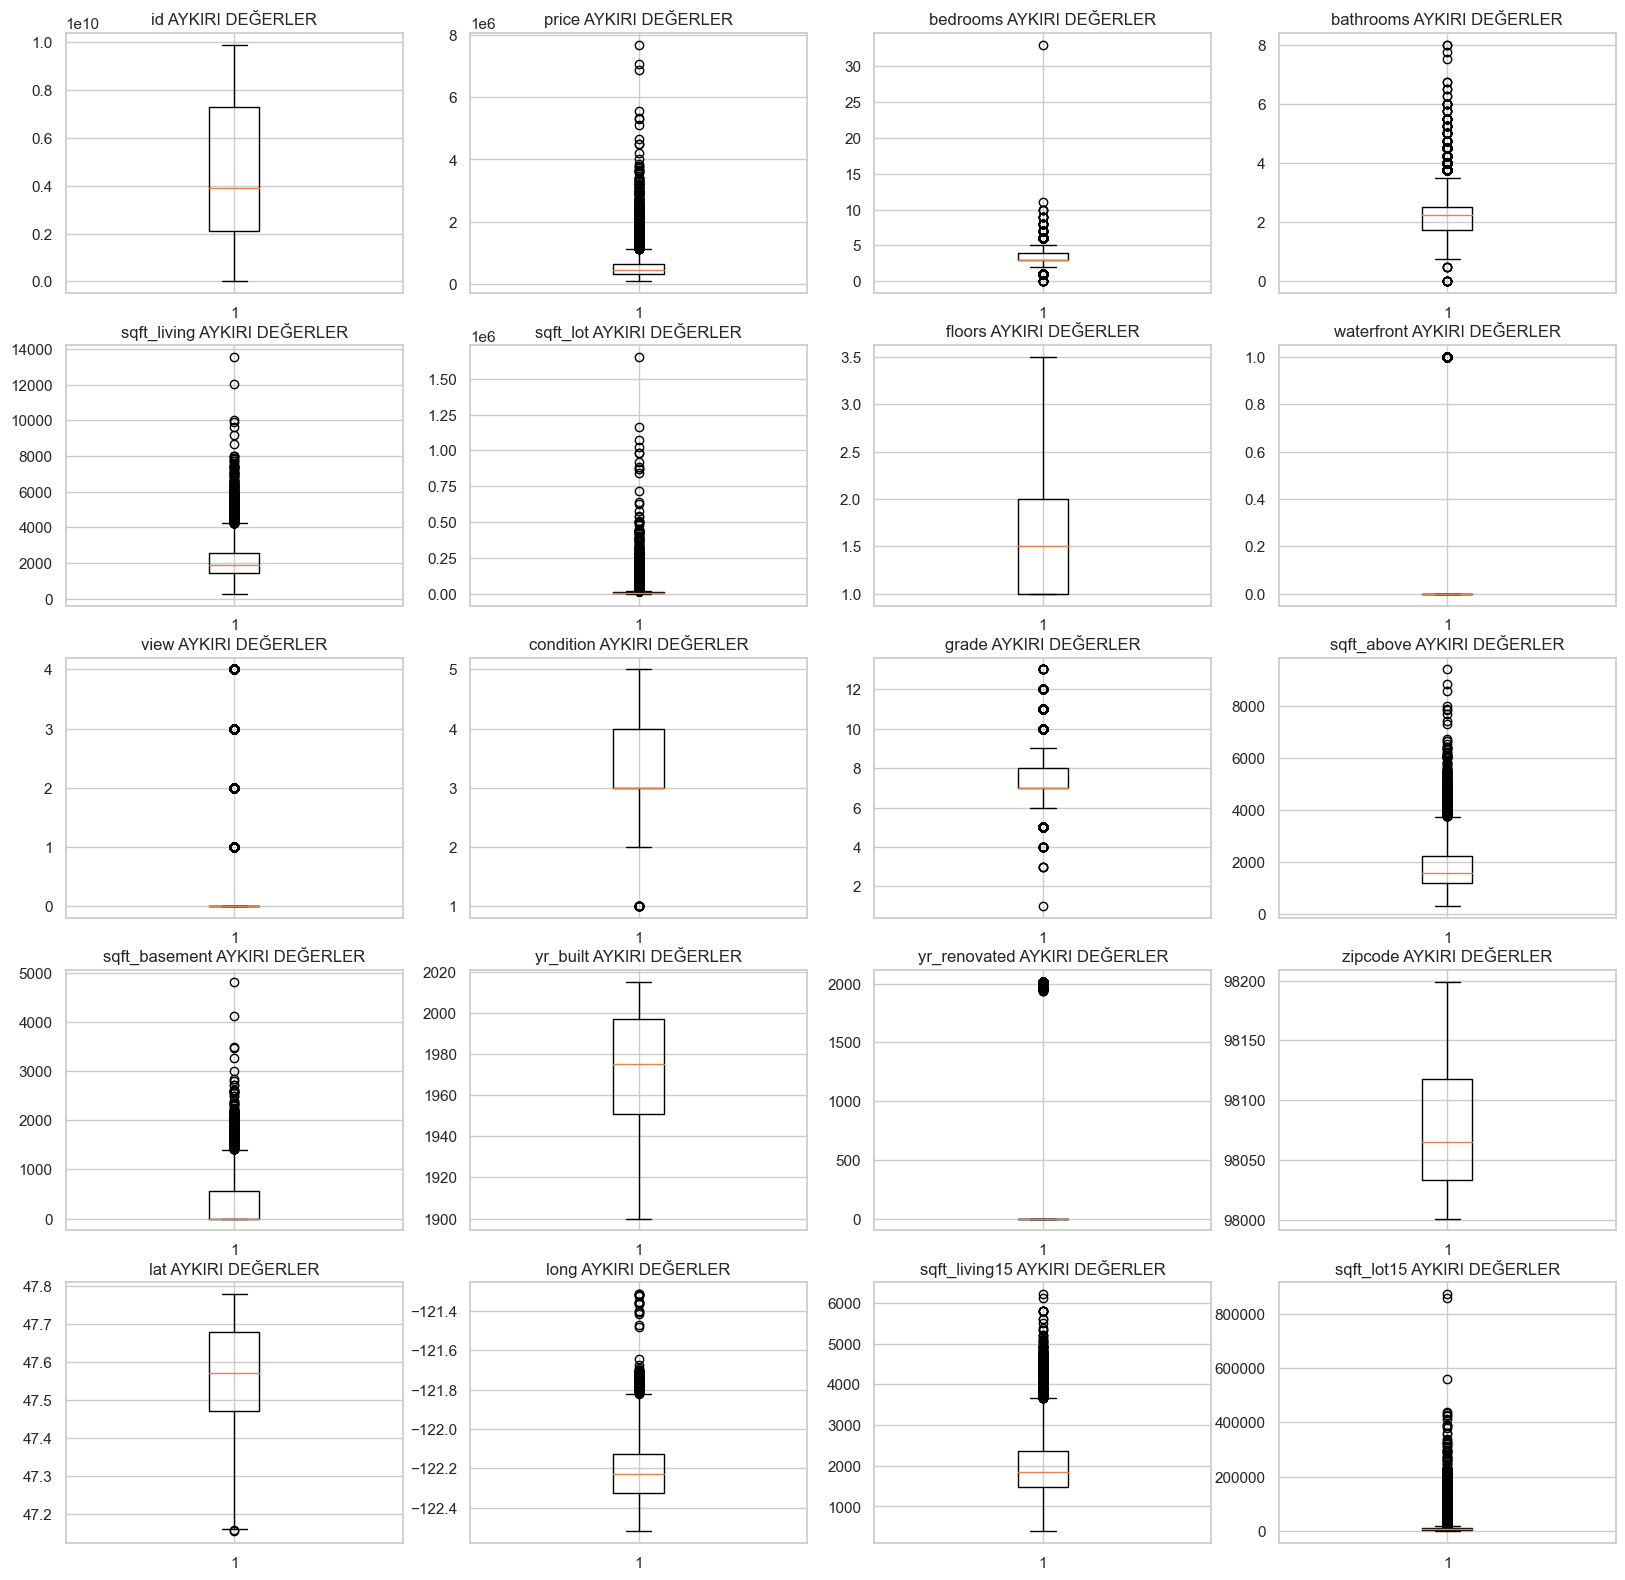

In [165]:
liste2 = house.columns
liste2 = liste.drop("date")
liste2 = list(liste2)
plt.figure(figsize = (20,20))

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.boxplot(house[liste2[i]])
    plt.title ("{} AYKIRI DEĞERLER".format(liste2[i]))


  Yukarıdaki boxplot görseline göre aykırı değerlei fazla olan değişkenler :
price, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_renovated, long, sqft_living15, sqft_lot15



### TUKEY

In [166]:
asigi = pd.DataFrame ( columns = ["asiri_değer_sayisi","esik_deger"])
Q1,Q3 = np.percentile(house["price"],[25,75])
step = Q3-Q1    

for c in np.arange(0,5,0.5):
    max_sinir = Q3 + c*step
    min_sinir = Q1 - c*step
    asiri_deger_sayisi = len(np.where((house["price"] > max_sinir) | (house["price"] < min_sinir ))[0])
    asigi = asigi.append({"asiri_değer_sayisi" : asiri_deger_sayisi, "esik_deger" : c},  ignore_index=True)

asigi

,asiri_değer_sayisi,esik_deger
0,10776.000,0.000
1,3182.000,0.500
2,1656.000,1.000
3,1146.000,1.500
4,810.000,2.000
5,567.000,2.500
6,420.000,3.000
7,309.000,3.500
8,232.000,4.000
9,189.000,4.500



liste2 = house.columns
liste2 = liste.drop("date")
liste2 = list(liste2)
for i in liste2:
    exec('{} = pd.DataFrame()'.format(i))
    i["asiri_değer_sayisi"] = np.NaN
    i["esik_deger"] = np.NaN
    Q1,Q3 = np.percentile(house[i],[25,75])
    step = Q3-Q1
    for c in np.arange(0,5,0.5):
        max_sinir = Q3 + c*step
        min_sinir = Q1 - c*step
        asiri_deger_sayisi = len(np.where((house[i] > max_sinir) | (house[i] < min_sinir ))[0])
        i = i.append({"asiri_değer_sayisi" : asiri_deger_sayisi, "esik_deger" : c},  ignore_index=True)
      


Yukarıda her bi değişken için ayrı ayrı dataframe oluşturmak istedim ama başaramadım. nasıl yazabilirim ?

# AYKIRI DEĞERLERLERİN GİDERİLMESİ VE TERK DEĞİŞKNLİ ANALİZ

In [167]:
aykırı_liste = ["price", "bathrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_renovated", "sqft_living15", "sqft_lot15"]
w_aykırı_liste = ["w_price", "w_bathrooms", "w_sqft_living", "w_sqft_lot", "w_sqft_above", "w_sqft_basement", "w_yr_renovated", "w_sqft_living15", "w_sqft_lot15"]


In [168]:
for i in range(9):
    house[ w_aykırı_liste[i]] = winsorize(house[aykırı_liste[i]],(0,0.1))

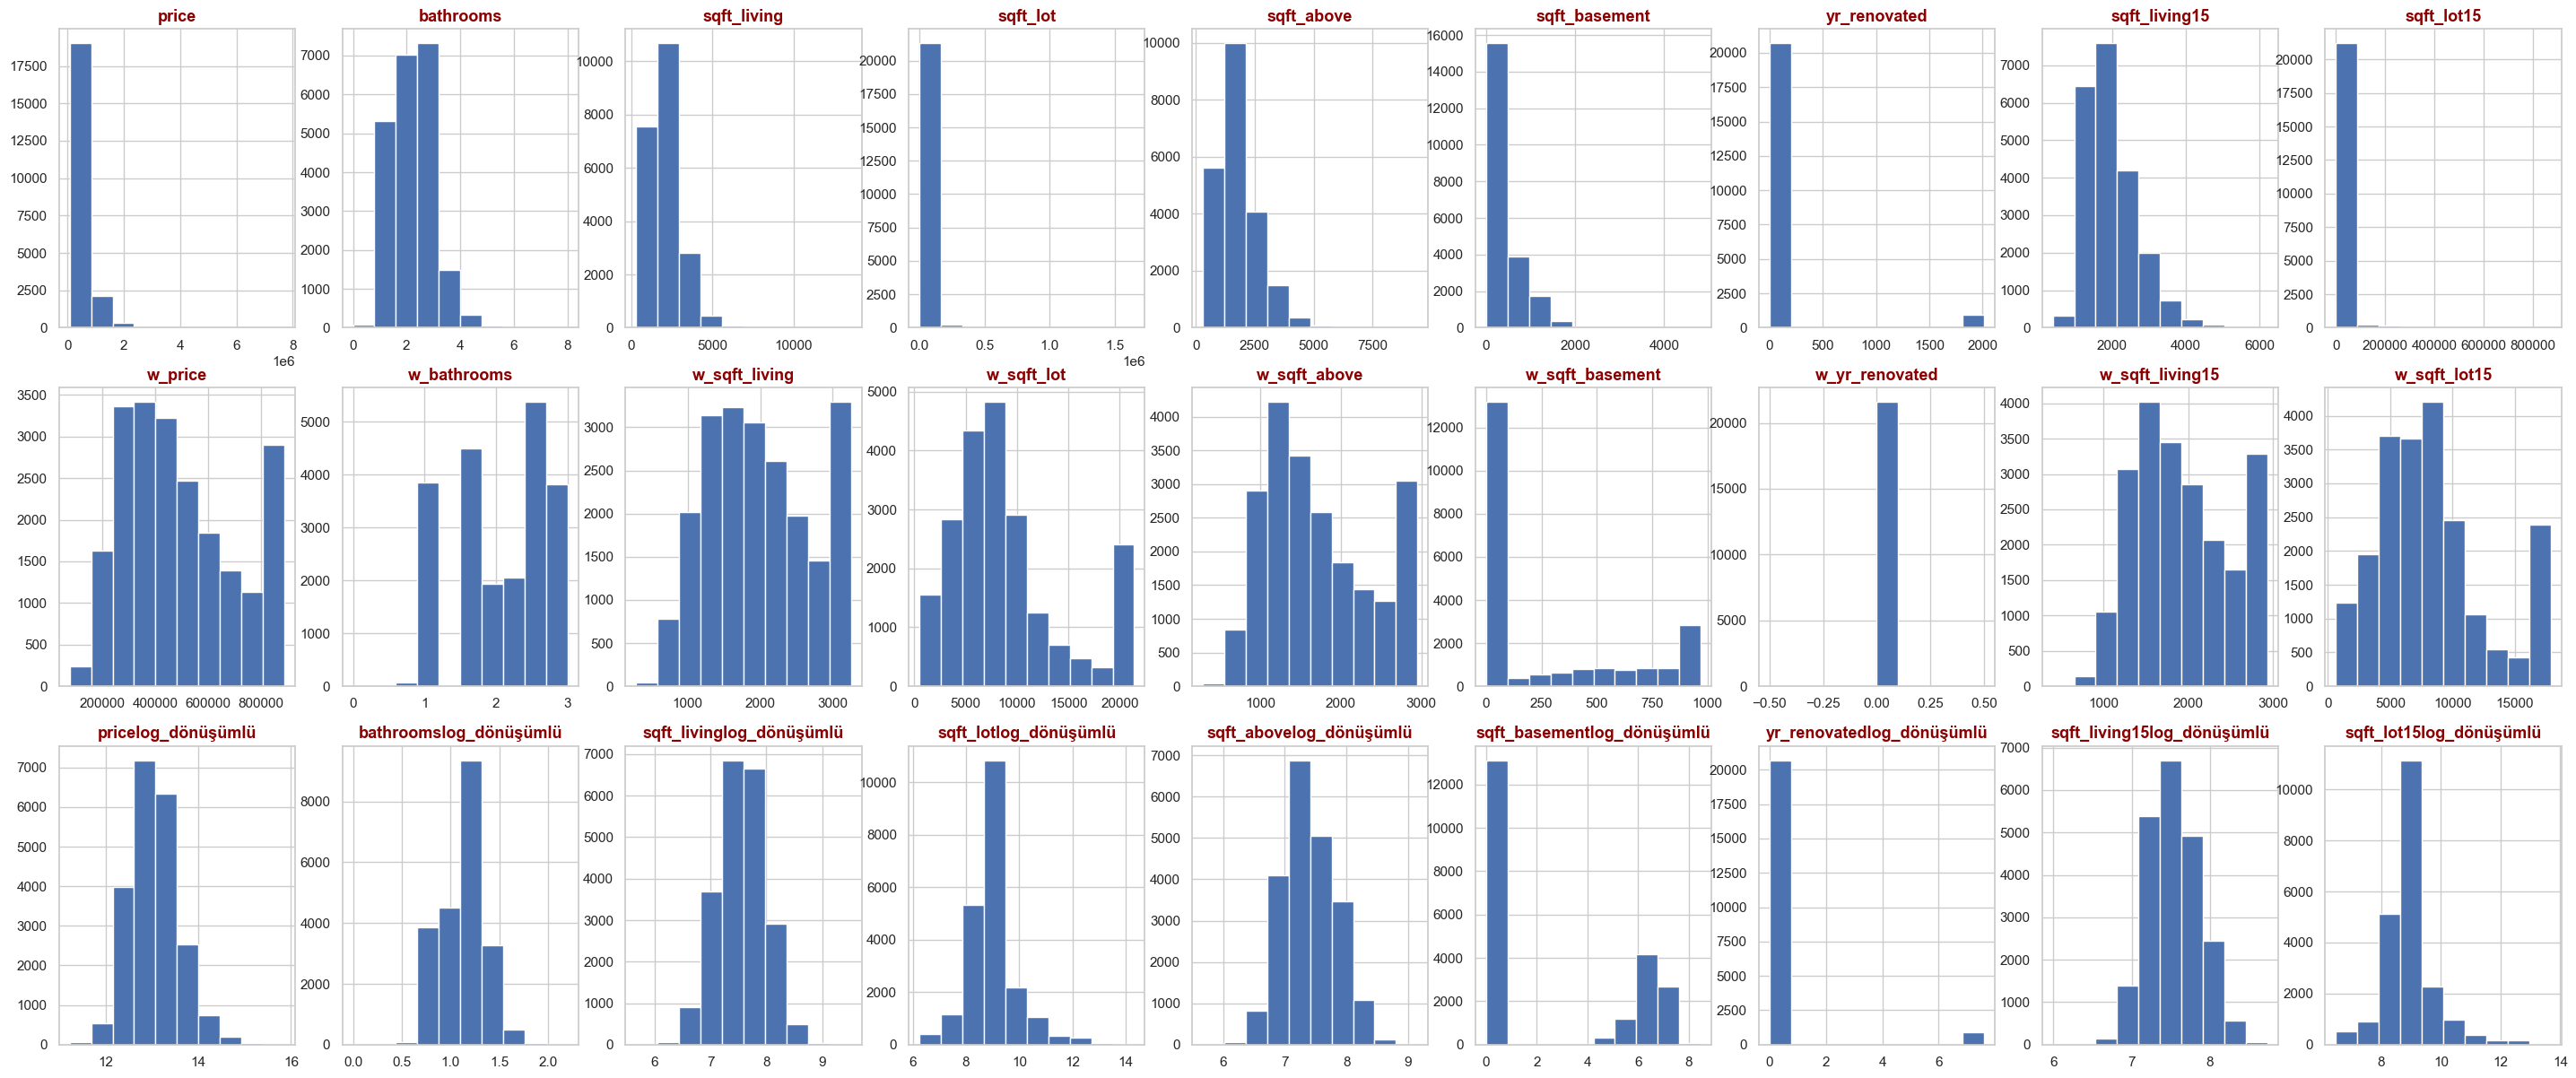

In [169]:
plt.figure(figsize = (36,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
aykırı_liste = ["price", "bathrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_renovated", "sqft_living15", "sqft_lot15"]
w_aykırı_liste = ["w_price", "w_bathrooms", "w_sqft_living", "w_sqft_lot", "w_sqft_above", "w_sqft_basement", "w_yr_renovated", "w_sqft_living15", "w_sqft_lot15"]

for i in range (9):
    plt.subplot(3,9,i+1)
    plt.hist(house[aykırı_liste[i]])
    plt.title(aykırı_liste[i], fontdict = baslik_font)
for i in range (9):
    plt.subplot(3,9,i+10)
    plt.hist(house[w_aykırı_liste[i]])
    plt.title(w_aykırı_liste[i], fontdict = baslik_font)
for i in range (9):
    plt.subplot(3,9,i+19)
    plt.hist(np.log(house[aykırı_liste[i]]+1))
    plt.title(aykırı_liste[i] +"log_dönüşümlü", fontdict = baslik_font)




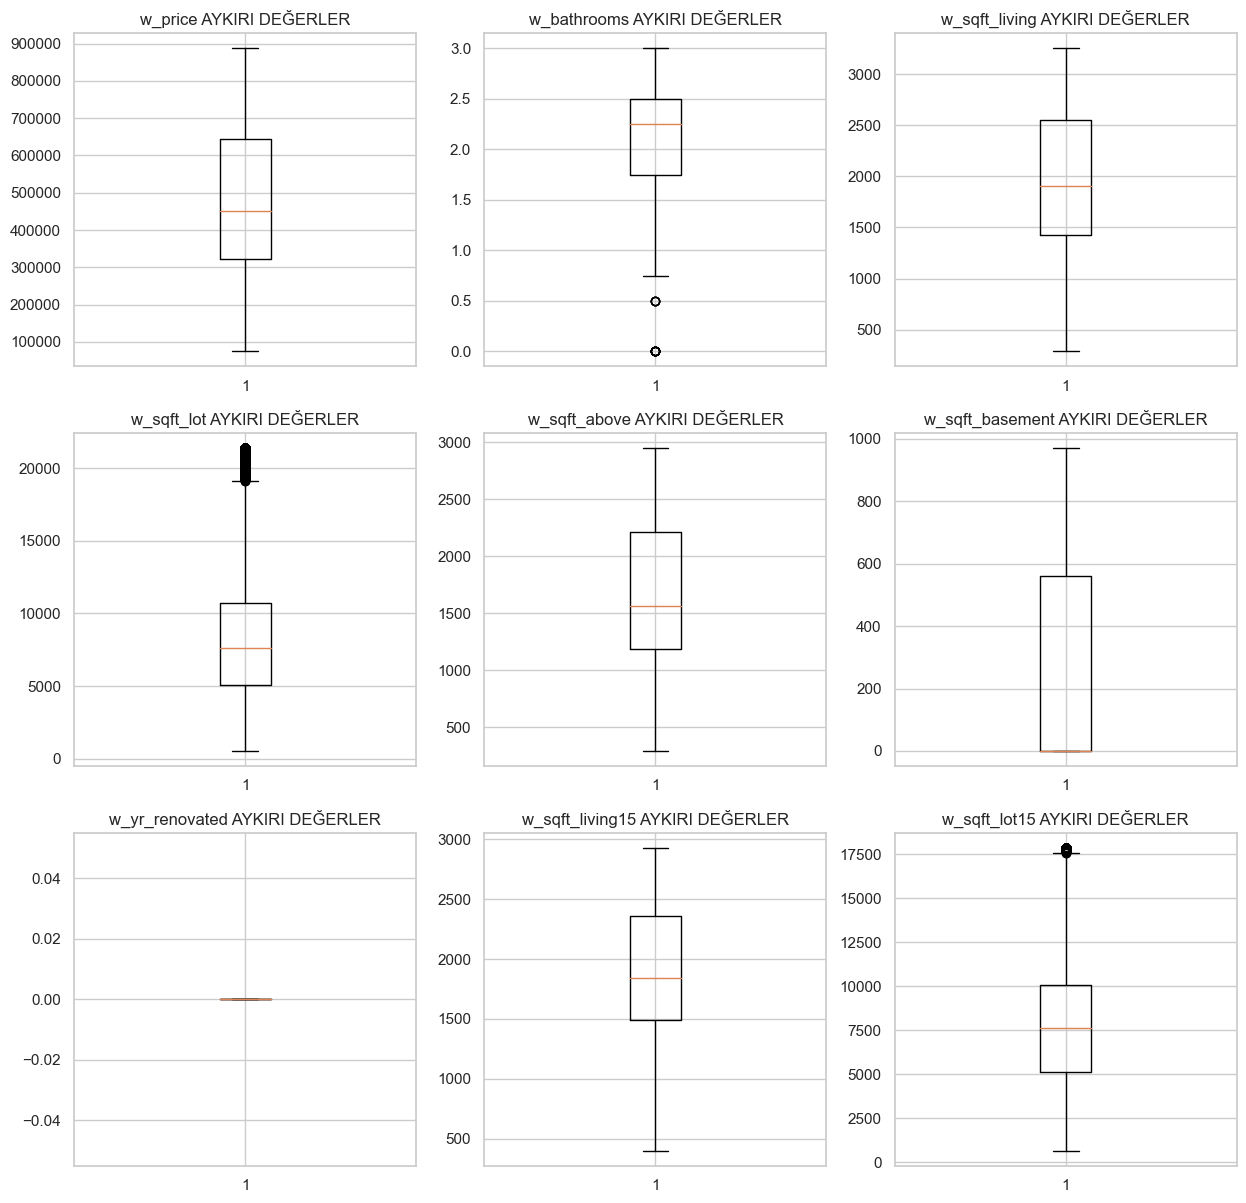

In [170]:
w_aykırı_liste = ["w_price", "w_bathrooms", "w_sqft_living", "w_sqft_lot", "w_sqft_above", "w_sqft_basement", "w_yr_renovated", "w_sqft_living15", "w_sqft_lot15"]

plt.figure(figsize = (15,15))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.boxplot(house[w_aykırı_liste[i]])
    plt.title ("{} AYKIRI DEĞERLER".format(w_aykırı_liste[i]))

In [171]:

log_aykırı_liste = ["log_price", "log_bathrooms", "log_sqft_living", "log_sqft_lot", "log_sqft_above", "log_sqft_basement", "log_yr_renovated", "log_sqft_living15", "log_sqft_lot15"]

for i in range(9):
    house[ log_aykırı_liste[i]] = np.log(house[aykırı_liste[i]]+1)

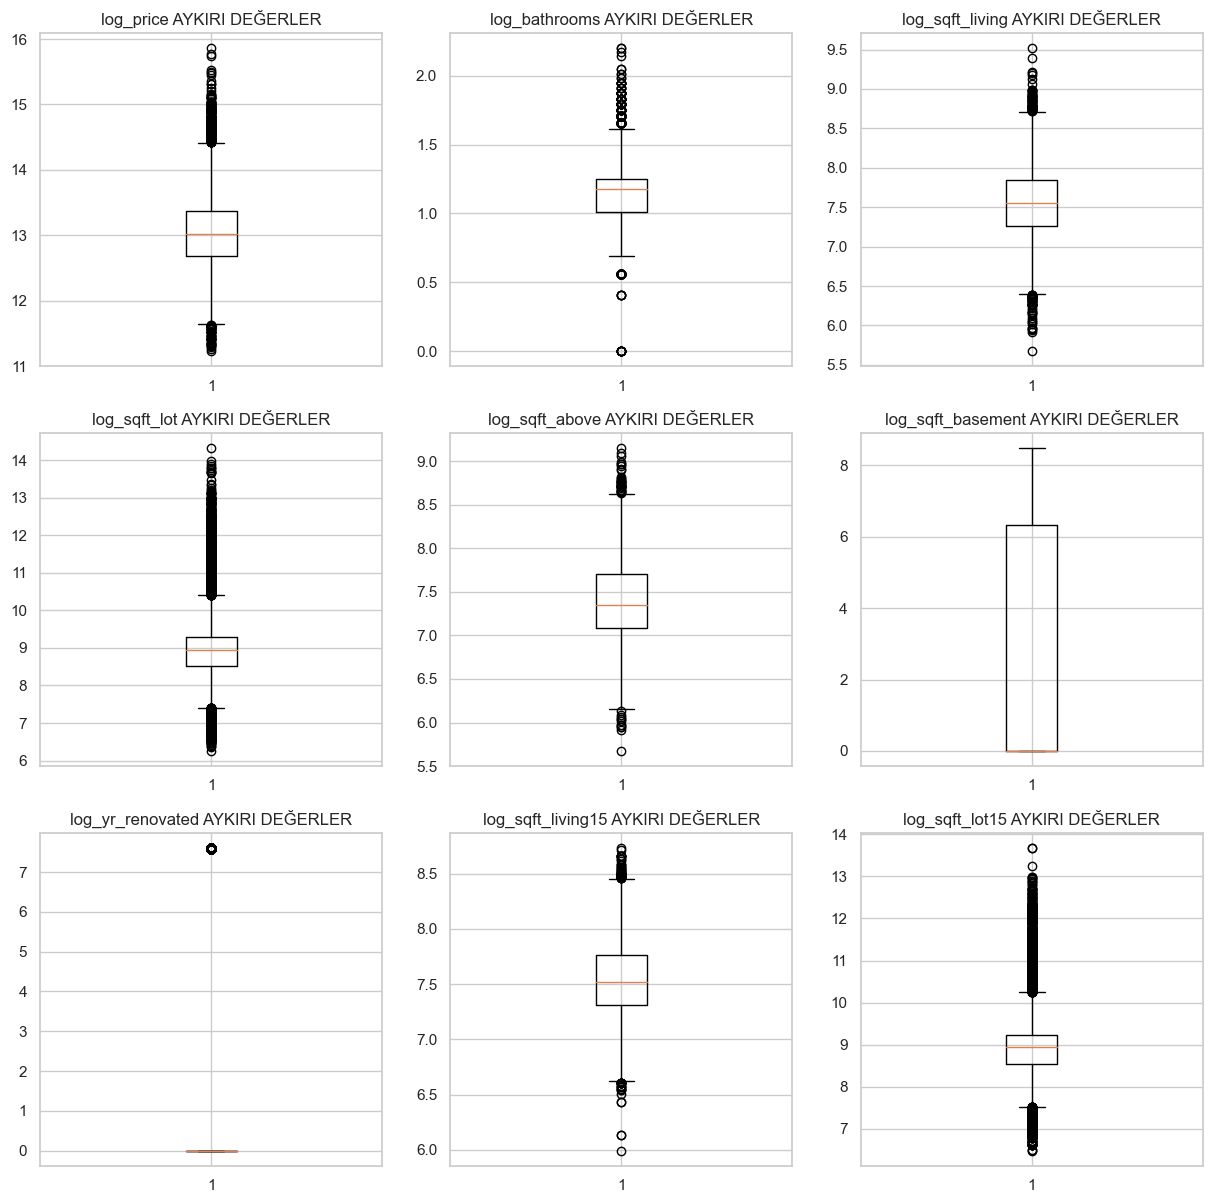

In [172]:
plt.figure(figsize = (15,15))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.boxplot(house[log_aykırı_liste[i]])
    plt.title ("{} AYKIRI DEĞERLER".format(log_aykırı_liste[i]))

Aykırılıklardan kurtulma anlamında bakackasak Winsorize işleminden sonra değişkenlerdeki aşırı değerlerin büyük çoğunluğu elemine olmuş gözüküyor.
Şimdi İstatistik olarak normal dağılım sağlanılmıış mı ona bakalım


# Jarque-Bera ve Normality testi

In [173]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

log_aykırı_liste = ["log_price", "log_bathrooms", "log_sqft_living", "log_sqft_lot", "log_sqft_above", "log_sqft_basement", "log_yr_renovated", "log_sqft_living15", "log_sqft_lot15"]

for i in log_aykırı_liste:

    jb_stats = jarque_bera(house[i])
    norm_stats = normaltest(house[i])
    print("{} Test Sonuçları".format(i))
    print("Jarque_Bera test sonucu {0} ve p değei {1}".format(jb_stats[0], jb_stats[1]))
    print("Nomality test sonucu {0} ve p değei {1}".format(norm_stats[0], norm_stats[1]))
    print("----------")


log_price Test Sonuçları
Jarque_Bera test sonucu 1090.5175054859492 ve p değei 0.0
Nomality test sonucu 852.1942211651804 ve p değei 8.879246628768088e-186
----------
log_bathrooms Test Sonuçları
Jarque_Bera test sonucu 297.4773580635799 ve p değei 0.0
Nomality test sonucu 314.92430952437104 ve p değei 4.1214978553058887e-69
----------
log_sqft_living Test Sonuçları
Jarque_Bera test sonucu 7.101644127710344 ve p değei 0.028701035869465263
Nomality test sonucu 7.17994943234505 ve p değei 0.027599028223495786
----------
log_sqft_lot Test Sonuçları
Jarque_Bera test sonucu 13300.287062803214 ve p değei 0.0
Nomality test sonucu 4097.56280567229 ve p değei 0.0
----------
log_sqft_above Test Sonuçları
Jarque_Bera test sonucu 323.57761817983607 ve p değei 0.0
Nomality test sonucu 355.33671033306337 ve p değei 6.912159361467674e-78
----------
log_sqft_basement Test Sonuçları
Jarque_Bera test sonucu 3484.7483272995355 ve p değei 0.0
Nomality test sonucu 92886.56731683479 ve p değei 0.0
---------

In [174]:
w_aykırı_liste = ["w_price", "w_bathrooms", "w_sqft_living", "w_sqft_lot", "w_sqft_above", "w_sqft_basement", "w_yr_renovated", "w_sqft_living15", "w_sqft_lot15"]

for i in w_aykırı_liste:

    jb_stats = jarque_bera(house[i])
    norm_stats = normaltest(house[i])
    print("{} Test Sonuçları".format(i))
    print("Jarque_Bera test sonucu {0} ve p değei {1}".format(jb_stats[0], jb_stats[1]))
    print("Nomality test sonucu {0} ve p değei {1}".format(norm_stats[0], norm_stats[1]))
    print("----------")

w_price Test Sonuçları
Jarque_Bera test sonucu 1487.1789609674006 ve p değei 0.0
Nomality test sonucu 3153.491807968139 ve p değei 0.0
----------
w_bathrooms Test Sonuçları
Jarque_Bera test sonucu 1327.386222628303 ve p değei 0.0
Nomality test sonucu 5238.137863859484 ve p değei 0.0
----------
w_sqft_living Test Sonuçları
Jarque_Bera test sonucu 1074.3472372008114 ve p değei 0.0
Nomality test sonucu 4398.655584033526 ve p değei 0.0
----------
w_sqft_lot Test Sonuçları
Jarque_Bera test sonucu 4046.4181057578653 ve p değei 0.0
Nomality test sonucu 2810.0781402018083 ve p değei 0.0
----------
w_sqft_above Test Sonuçları
Jarque_Bera test sonucu 1672.6198128386409 ve p değei 0.0
Nomality test sonucu 3557.4023402796197 ve p değei 0.0
----------
w_sqft_basement Test Sonuçları
Jarque_Bera test sonucu 3776.3384797602757 ve p değei 0.0
Nomality test sonucu 3933.8107254716365 ve p değei 0.0
----------
w_yr_renovated Test Sonuçları
Jarque_Bera test sonucu nan ve p değei nan
Nomality test sonucu 53

In [175]:
aykırı_liste = ["price", "bathrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_renovated", "sqft_living15", "sqft_lot15"]

for i in w_aykırı_liste:

    jb_stats = jarque_bera(house[i])
    norm_stats = normaltest(house[i])
    print("{} Test Sonuçları".format(i))
    print("Jarque_Bera test sonucu {0} ve p değei {1}".format(jb_stats[0], jb_stats[1]))
    print("Nomality test sonucu {0} ve p değei {1}".format(norm_stats[0], norm_stats[1]))
    print("----------")

w_price Test Sonuçları
Jarque_Bera test sonucu 1487.1789609674006 ve p değei 0.0
Nomality test sonucu 3153.491807968139 ve p değei 0.0
----------
w_bathrooms Test Sonuçları
Jarque_Bera test sonucu 1327.386222628303 ve p değei 0.0
Nomality test sonucu 5238.137863859484 ve p değei 0.0
----------
w_sqft_living Test Sonuçları
Jarque_Bera test sonucu 1074.3472372008114 ve p değei 0.0
Nomality test sonucu 4398.655584033526 ve p değei 0.0
----------
w_sqft_lot Test Sonuçları
Jarque_Bera test sonucu 4046.4181057578653 ve p değei 0.0
Nomality test sonucu 2810.0781402018083 ve p değei 0.0
----------
w_sqft_above Test Sonuçları
Jarque_Bera test sonucu 1672.6198128386409 ve p değei 0.0
Nomality test sonucu 3557.4023402796197 ve p değei 0.0
----------
w_sqft_basement Test Sonuçları
Jarque_Bera test sonucu 3776.3384797602757 ve p değei 0.0
Nomality test sonucu 3933.8107254716365 ve p değei 0.0
----------
w_yr_renovated Test Sonuçları
Jarque_Bera test sonucu nan ve p değei nan
Nomality test sonucu 53

Hiç bir formasyonda da normal dağılımı gerçekleştiremedik. Boxcox u deneyelim.

In [222]:
from scipy.stats import boxcox

boxcox,_ = boxcox(house["price"])
jb_stats = jarque_bera(boxcox)
norm_stats = normaltest(boxcox)
    
print("{} Test Sonuçları".format(["price"]))
print("Jarque_Bera test sonucu {0} ve p değei {1}".format(jb_stats[0], jb_stats[1]))
print("Nomality test sonucu {0} ve p değei {1}".format(norm_stats[0], norm_stats[1]))
print("----------")

['price'] Test Sonuçları
Jarque_Bera test sonucu 89.82314713769593 ve p değei 0.0
Nomality test sonucu 68.11167273112167 ve p değei 1.6208326997065846e-15
----------


In [223]:


bathroomsboxcox,_ = boxcox(house[house["bathrooms"] > 0]["bathrooms"])
jb_stats = jarque_bera(bathroomsboxcox)
norm_stats = normaltest(bathroomsboxcox)
    
print("{} Test Sonuçları".format(["bathrooms"]))
print("Jarque_Bera test sonucu {0} ve p değei {1}".format(jb_stats[0], jb_stats[1]))
print("Nomality test sonucu {0} ve p değei {1}".format(norm_stats[0], norm_stats[1]))
print("----------")
    
    
    

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
math_boxcox,_ = boxcox(education_df[education_df["math score"] > 0]["math score"])

In [225]:

sqft_livingboxcox,_ = boxcox(house["sqft_living"])
jb_stats = jarque_bera(sqft_livingboxcox)
norm_stats = normaltest(sqft_livingboxcox)
    
print("{} Test Sonuçları".format(["sqft_living"]))
print("Jarque_Bera test sonucu {0} ve p değei {1}".format(jb_stats[0], jb_stats[1]))
print("Nomality test sonucu {0} ve p değei {1}".format(norm_stats[0], norm_stats[1]))
print("----------")
    

TypeError: 'numpy.ndarray' object is not callable

In [226]:
sqft_lotboxcox,_ = boxcox(house["sqft_lot"])
jb_stats = jarque_bera(sqft_livingboxcox)
norm_stats = normaltest(sqft_livingboxcox)
    
print("{} Test Sonuçları".format(["sqft_lot"]))
print("Jarque_Bera test sonucu {0} ve p değei {1}".format(jb_stats[0], jb_stats[1]))
print("Nomality test sonucu {0} ve p değei {1}".format(norm_stats[0], norm_stats[1]))
print("----------")

TypeError: 'numpy.ndarray' object is not callable

# ÇOK DEĞİŞKENLİ ANALİZ

### KORELASYON

In [ ]:
house.corr()

Text(0.5, 1.0, 'Korelasyon House')

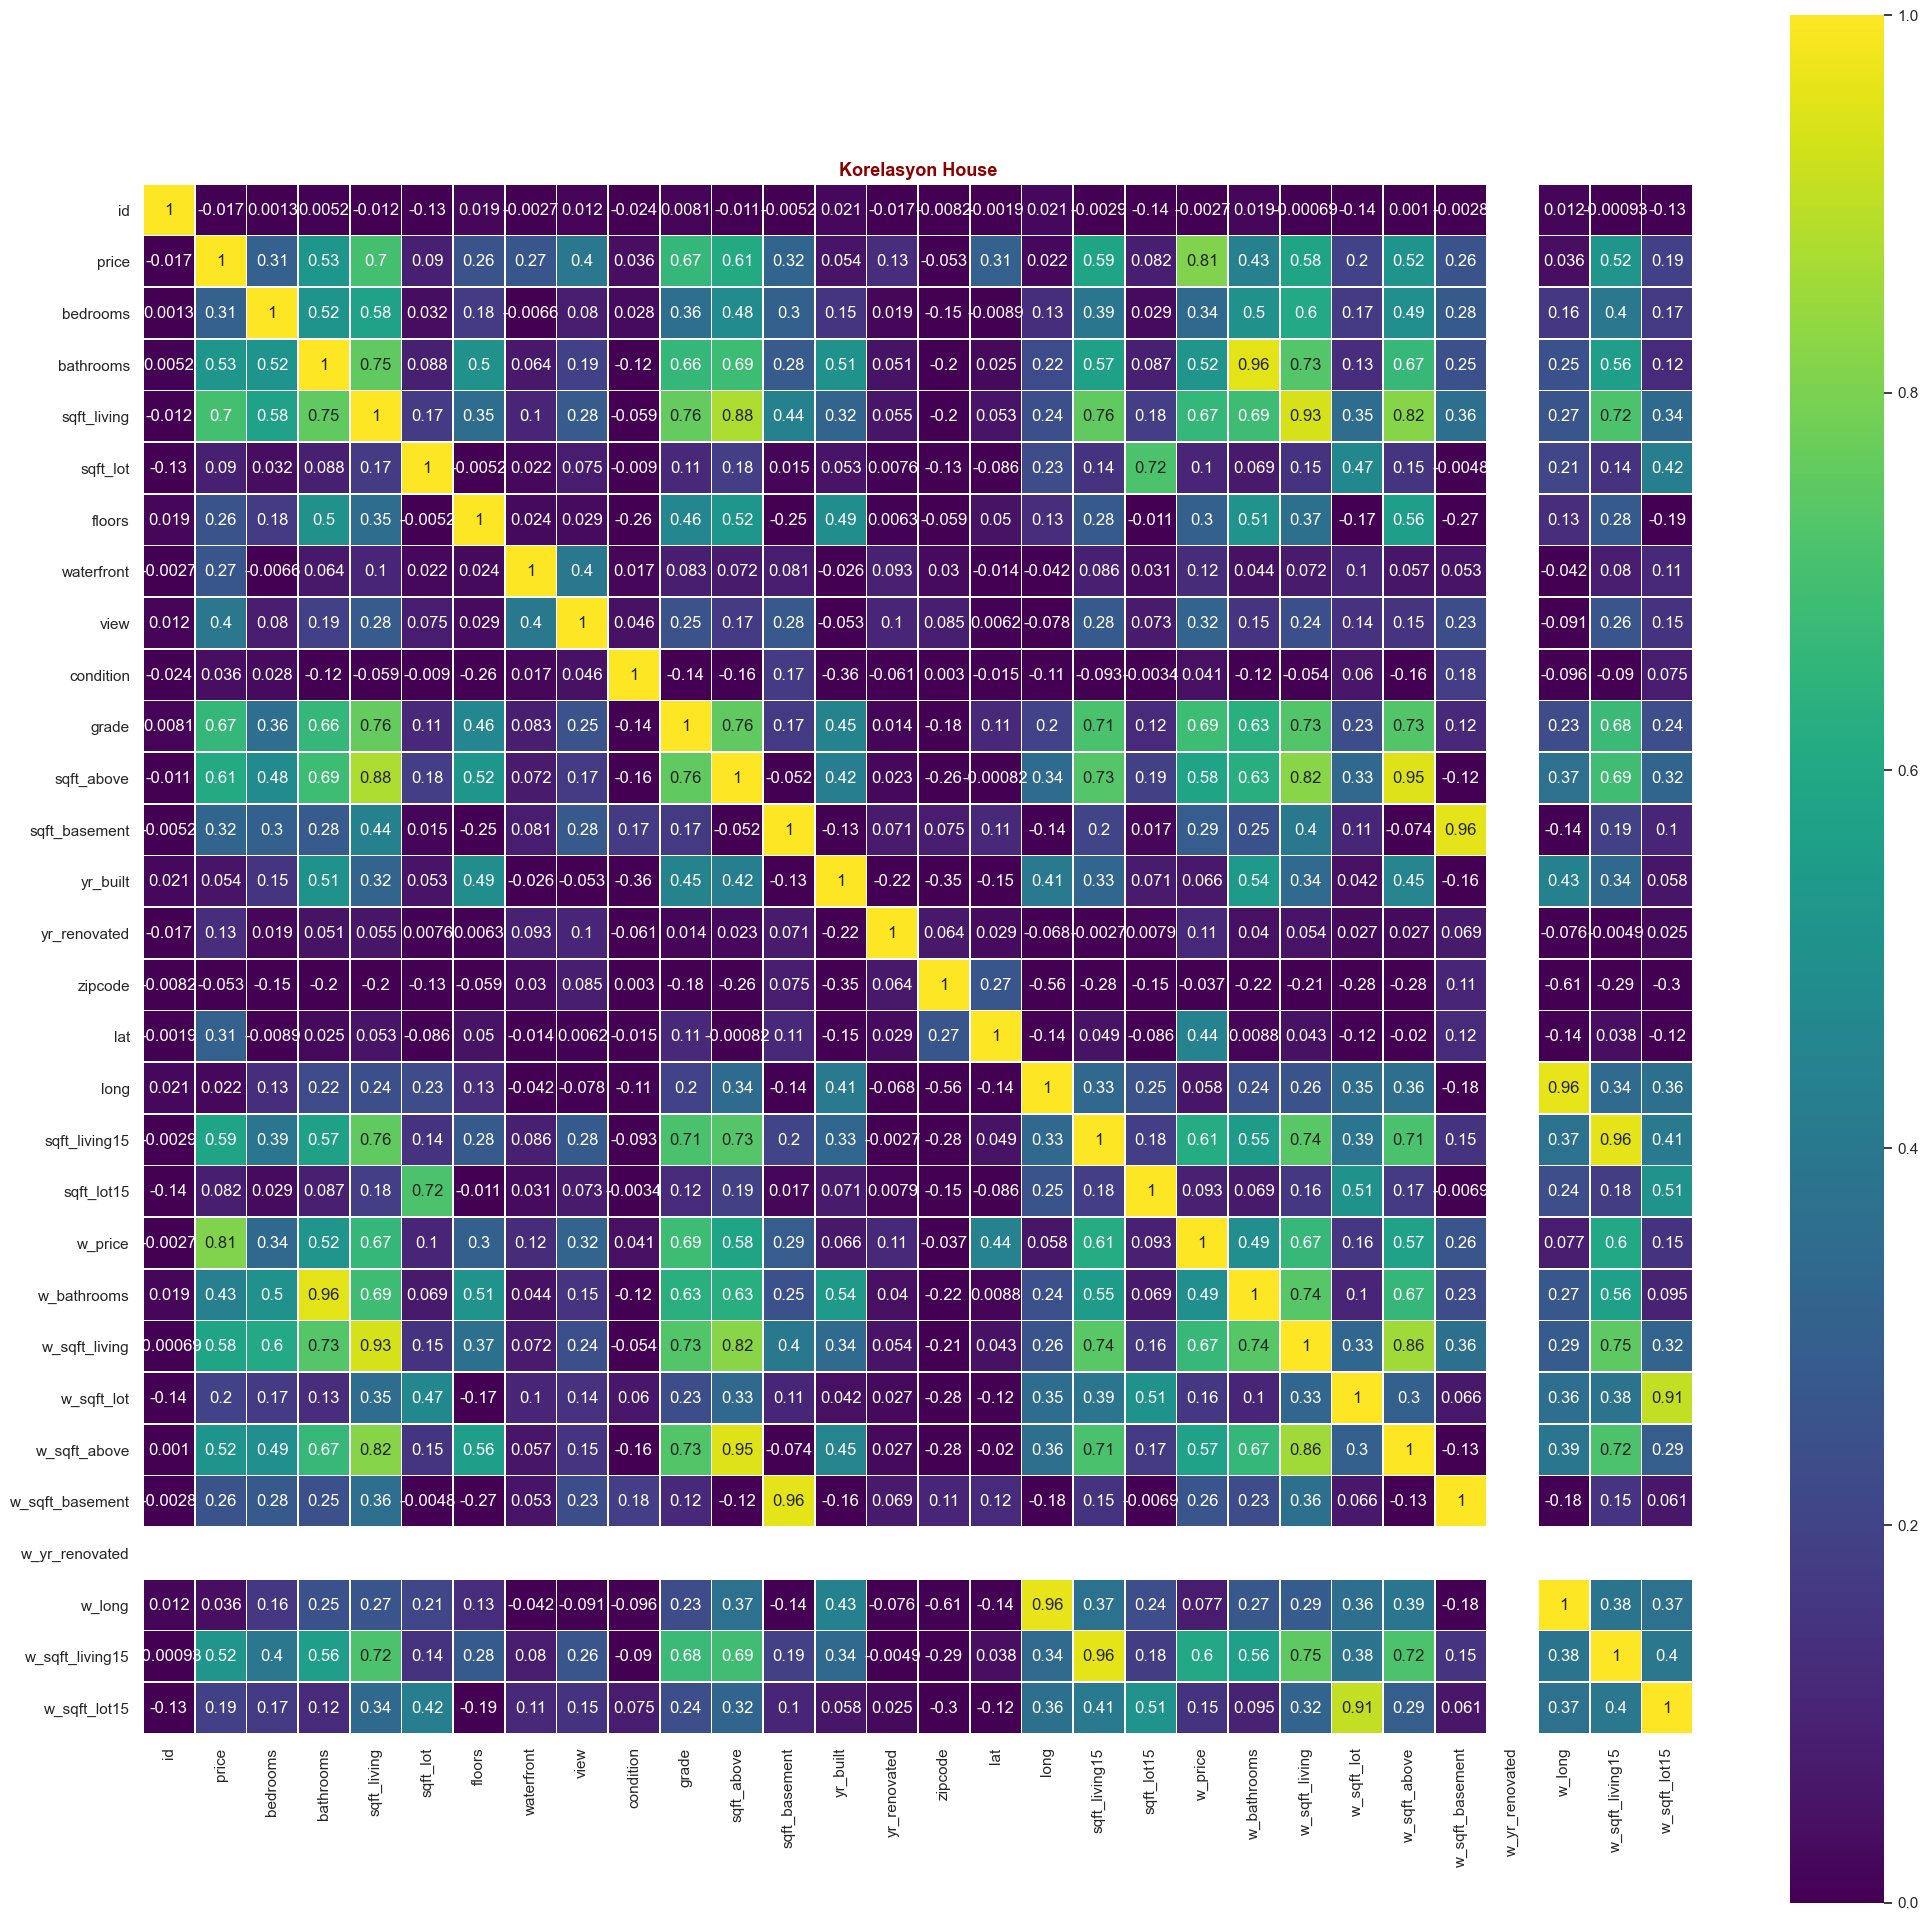

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(house.corr(), square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon House", fontdict=baslik_font)

w_price ile pozitif korelayon olanlar : w_sqft_living15, w_sqft_above, w_sqft_living

w_price ile negatif korelasyon olanlar : w_long, w_sqft_lot15, w_sqft_lot

### SCATTER

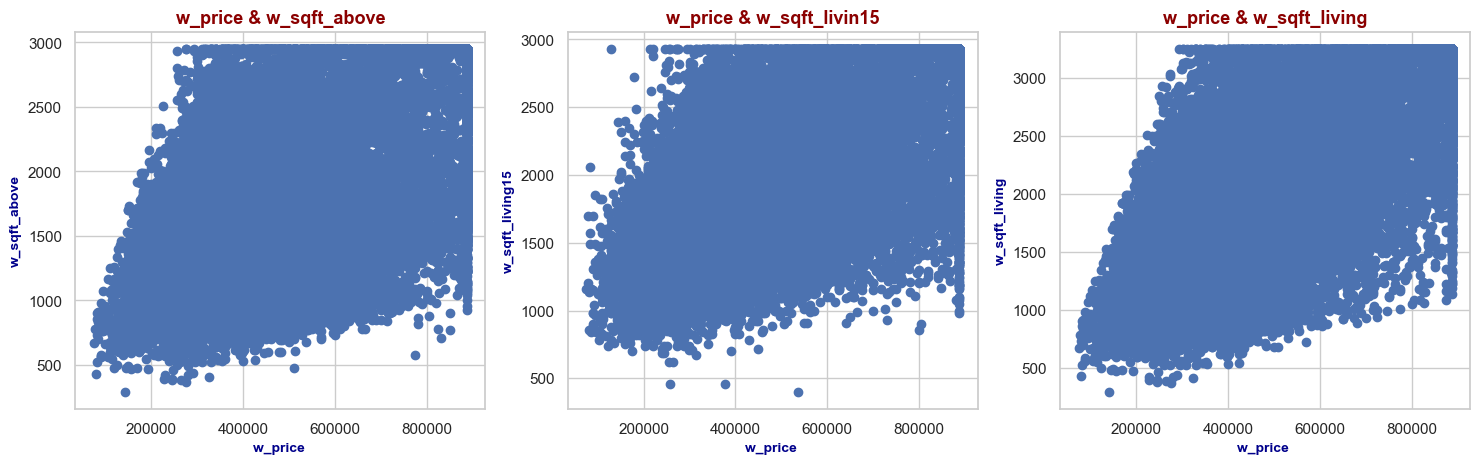

In [13]:
# W_PRİCE İLE POZİTİF KORELASYONLULARIN SCATTER GÖSTERİMİ

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(house["w_price"], house["w_sqft_above"])
plt.title("w_price & w_sqft_above", fontdict=baslik_font )
plt.xlabel('w_price ', fontdict=eksen_font )
plt.ylabel('w_sqft_above', fontdict=eksen_font )

plt.subplot(1,3,2)
plt.scatter(house["w_price"], house["w_sqft_living15"])
plt.title("w_price & w_sqft_livin15", fontdict=baslik_font )
plt.xlabel('w_price ', fontdict=eksen_font )
plt.ylabel('w_sqft_living15', fontdict=eksen_font )

plt.subplot(1,3,3)
plt.scatter(house["w_price"], house["w_sqft_living"])
plt.title("w_price & w_sqft_living", fontdict=baslik_font )
plt.xlabel('w_price ', fontdict=eksen_font )
plt.ylabel('w_sqft_living', fontdict=eksen_font )



plt.show()

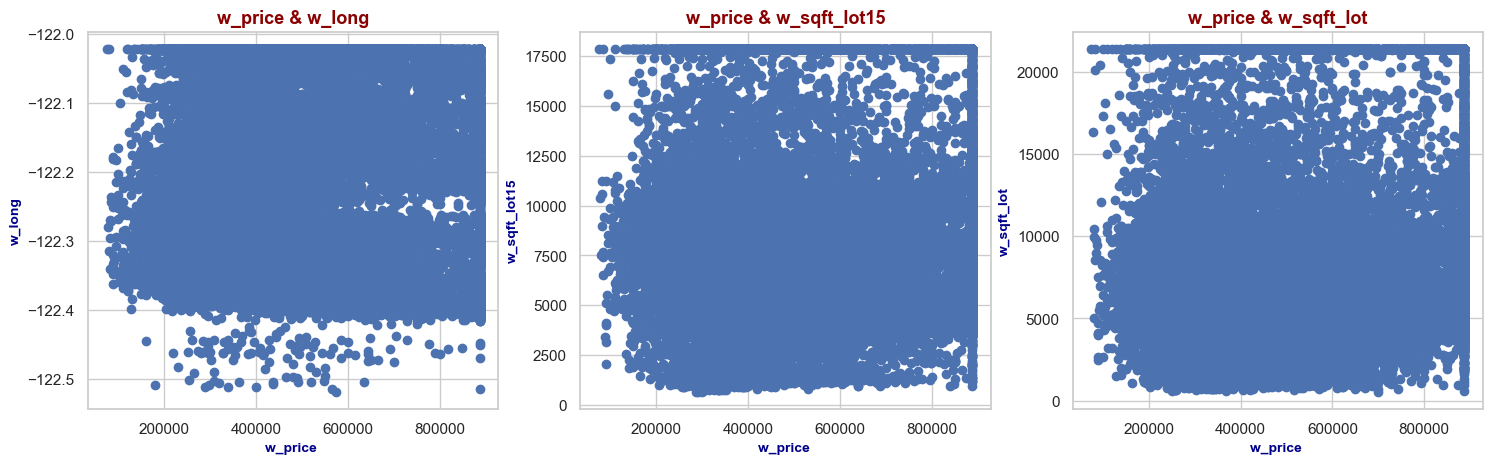

In [14]:
# W_PRİCE İLE NEGATİF KORELASYONLULARIN SCATTER GÖSTERİMİ

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(house["w_price"], house["w_long"])
plt.title("w_price & w_long", fontdict=baslik_font )
plt.xlabel('w_price ', fontdict=eksen_font )
plt.ylabel('w_long', fontdict=eksen_font )

plt.subplot(1,3,2)
plt.scatter(house["w_price"], house["w_sqft_lot15"])
plt.title("w_price & w_sqft_lot15", fontdict=baslik_font )
plt.xlabel('w_price ', fontdict=eksen_font )
plt.ylabel('w_sqft_lot15', fontdict=eksen_font )

plt.subplot(1,3,3)
plt.scatter(house["w_price"], house["w_sqft_lot"])
plt.title("w_price & w_sqft_lot", fontdict=baslik_font )
plt.xlabel('w_price ', fontdict=eksen_font )
plt.ylabel('w_sqft_lot', fontdict=eksen_font )



plt.show()